In [1]:
# importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# importing the dataset

dataset = pd.read_csv('housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# checking for missing value

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# removing missing values

dataset.dropna(inplace=True)

In [9]:
# checking if missing values have been removed

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
# checking correlation of different columns

corr_matrix = dataset.drop(columns=['ocean_proximity']).corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

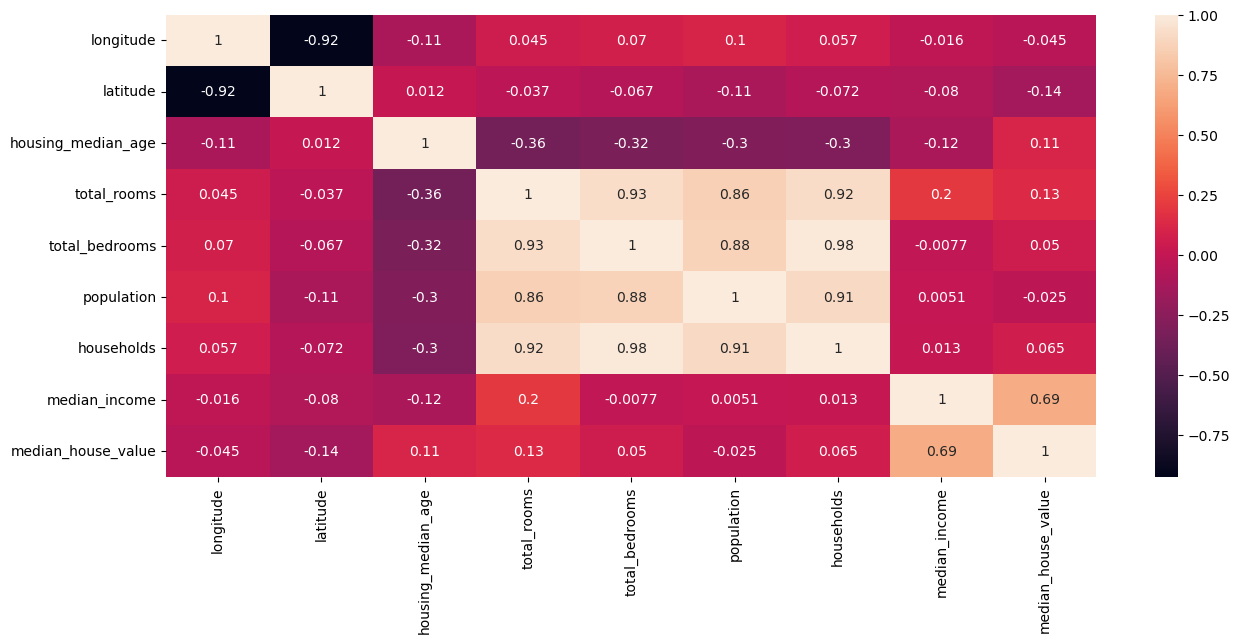

In [15]:
#visualizing correlation with heatmap

plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, annot=True)

In [17]:
# splitting the data into independent and dependent variable

columns_to_include = dataset.columns.difference(['median_house_value'])

X = dataset[columns_to_include].values
y = dataset['median_house_value'].values

In [43]:
np.set_printoptions(threshold=np.inf)
X[:10]

array([[0.0, 0.0, 0.0, 1.0, 0.0, 126.0, 41.0, 37.88, -122.23, 8.3252,
        322.0, 129.0, 880.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1138.0, 21.0, 37.86, -122.22, 8.3014,
        2401.0, 1106.0, 7099.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 177.0, 52.0, 37.85, -122.24, 7.2574,
        496.0, 190.0, 1467.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 219.0, 52.0, 37.85, -122.25, 5.6431,
        558.0, 235.0, 1274.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 259.0, 52.0, 37.85, -122.25, 3.8462,
        565.0, 280.0, 1627.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 193.0, 52.0, 37.85, -122.25, 4.0368,
        413.0, 213.0, 919.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 514.0, 52.0, 37.84, -122.25, 3.6591,
        1094.0, 489.0, 2535.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 647.0, 52.0, 37.84, -122.25, 3.12,
        1157.0, 687.0, 3104.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 595.0, 42.0, 37.84, -122.26, 2.0804,
        1206.0, 665.0, 2555.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 714.0, 52.0, 37.84, -122.25, 3.6912,
        1551.0, 707

In [45]:
y[:10]

array([452600., 358500., 352100., 341300., 342200., 269700., 299200.,
       241400., 226700., 261100.])

In [23]:
# encoding categorical data into dummy variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [47]:
X[:10]

array([[0.0, 0.0, 0.0, 1.0, 0.0, 126.0, 41.0, 37.88, -122.23, 8.3252,
        322.0, 129.0, 880.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1138.0, 21.0, 37.86, -122.22, 8.3014,
        2401.0, 1106.0, 7099.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 177.0, 52.0, 37.85, -122.24, 7.2574,
        496.0, 190.0, 1467.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 219.0, 52.0, 37.85, -122.25, 5.6431,
        558.0, 235.0, 1274.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 259.0, 52.0, 37.85, -122.25, 3.8462,
        565.0, 280.0, 1627.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 193.0, 52.0, 37.85, -122.25, 4.0368,
        413.0, 213.0, 919.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 514.0, 52.0, 37.84, -122.25, 3.6591,
        1094.0, 489.0, 2535.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 647.0, 52.0, 37.84, -122.25, 3.12,
        1157.0, 687.0, 3104.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 595.0, 42.0, 37.84, -122.26, 2.0804,
        1206.0, 665.0, 2555.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 714.0, 52.0, 37.84, -122.25, 3.6912,
        1551.0, 707

In [27]:
# splitting the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# importing the linear regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
# comparing predicted prices with actual prices

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
reg_results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

reg_results[:10]

array([[120374.  ,  98900.  ],
       [160005.  , 153000.  ],
       [105825.  ,  91300.  ],
       [376911.17, 345200.  ],
       [341776.  , 344100.  ],
       [153479.  , 131300.  ],
       [268287.  , 241200.  ],
       [145567.01, 156300.  ],
       [168936.  , 163600.  ],
       [126455.  ,  96800.  ]])

In [33]:
# checking the accuracy of our predictions using r-squared

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6526096664530414

In [ ]:
## an r-squared of 0.65 means that this is not a good model for this dataset

In [37]:
# importing random forest regression model

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [53]:
# comparing predicted prices with actual prices

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
forest_results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

forest_results[:10]

array([[120374.  ,  98900.  ],
       [160005.  , 153000.  ],
       [105825.  ,  91300.  ],
       [376911.17, 345200.  ],
       [341776.  , 344100.  ],
       [153479.  , 131300.  ],
       [268287.  , 241200.  ],
       [145567.01, 156300.  ],
       [168936.  , 163600.  ],
       [126455.  ,  96800.  ]])

In [41]:
# checking the accuracy of our predictions using r-squared

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8187268455848529

In [ ]:
## a greater r-squared shows that random forest model is a better model for this dataset